In [82]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("Desktop/LogisticRegression_Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


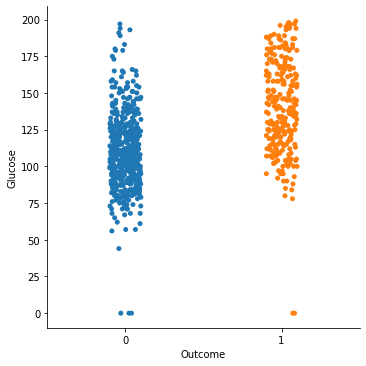

In [84]:
sns.catplot(x="Outcome", y="Glucose", data=df)

In [85]:
####first I'm gonna compute cost function:

In [86]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = np.divide(1,(1+np.power(math.e,-z)))
    return g

## We need sigmoid for cost function

In [87]:
def costFunction(theta, X, y):
    m = len(y)
    J = 0    #cost function
    grad = np.zeros(theta.shape)   #gradient
    J = (1/m)*np.sum([np.subtract((np.dot(-y[i],np.log(sigmoid(np.dot(np.transpose(theta),X[i]))))) ,
                                     np.dot((1-y[i]),np.log(1-(sigmoid(np.dot(np.transpose(theta),X[i])))))) for i in range(m)])
    for j in range(len(grad)):
        grad[j] = (1/m)*np.sum([(np.subtract(sigmoid(np.dot(np.transpose(theta),X[i])),y[i])*X[i][j]) for i  in range(m)])    
    return J , grad

In [88]:
def featureNormalization(X):
    m = len(X[0,:])
    mean=np.zeros((m,1))
    std=np.zeros((m,1))
    for i in range(m):
        mean[i]=(np.mean(X[:,i]))
        std[i]=(np.std(X[:,i]))
        X[:,i]=((X[:,i]-mean[i])/std[i])
    return X, mean , std

# like the code I wrote for linear regression

In [89]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values  #target column

In [90]:
# Now I can display initial cost and initial gradient (It means Thetas are zero):

m , n = X.shape
X=np.float32(X)
X, X_mean, X_std = featureNormalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
y = y.reshape(m,1)

In [91]:
initial_theta = np.zeros((n+1,1))
cost, grad = costFunction(initial_theta,X,y)
initial_theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [92]:
print("initial Cost: ", cost)
print("initial Gradient: \n", grad)

initial Cost:  0.6931471805599452
initial Gradient: 
 [[ 0.15104167]
 [-0.1057657 ]
 [-0.22239172]
 [-0.03101423]
 [-0.03562997]
 [-0.06222448]
 [-0.13951022]
 [-0.08286116]
 [-0.11361019]]


In [93]:
## Using gradient desscent to find optimal Theta:

In [94]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    grad=costFunction(theta,X,y)[1]
    for i in range(num_iters):        
        theta = np.subtract(theta ,alpha*grad )
        a = costFunction(theta,X,y)
        grad = a[1]
        J_history.append(a[0])
    
    return theta , J_history

In [95]:
theta , J_history = gradientDescent(X, y, initial_theta, 1, 100)

In [96]:
print("Cost (when theta found by gradient descent): ", J_history[-1])
print("Theta (when it is optimized by gradient descent): \n",theta)

Cost (when theta found by gradient descent):  0.4709931084788419
Theta (when it is optimized by gradient descent): 
 [[-0.87097272]
 [ 0.41450681]
 [ 1.12296163]
 [-0.25703353]
 [ 0.00957995]
 [-0.13684286]
 [ 0.70673823]
 [ 0.31288012]
 [ 0.17503352]]


In [97]:
##feature mapping:
#### the data in dataset is not linearly separable. But we still like to use logistic regression to classify the data points. To do so, we introduce more features to use.

In [ ]:
def mapFeature(x1,x2,x3,x4,x5,x6,x7,x8,degree):
    out = np.ones(len(x1)).reshape(len(x1),1)     #all polynomial terms up to the given degree
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out